## Hypothesis
1. discount increases churning rate decreases.
2. if Timeperiod of subscription of customers is more-->lesser chances of churning.
3. 

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
pd.set_option('max_columns', 100)

%matplotlib inline

In [104]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [105]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,0,0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/31/2015,189.95,0,0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/17/2015,47.96,0,0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,3/30/2010,3/31/2015,240.04,0,0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,1/13/2010,3/7/2016,1/13/2010,3/9/2015,445.75,526,0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [106]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [107]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri

    fig,ax = plt.subplots(figsize=(12,12))
    sb.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()

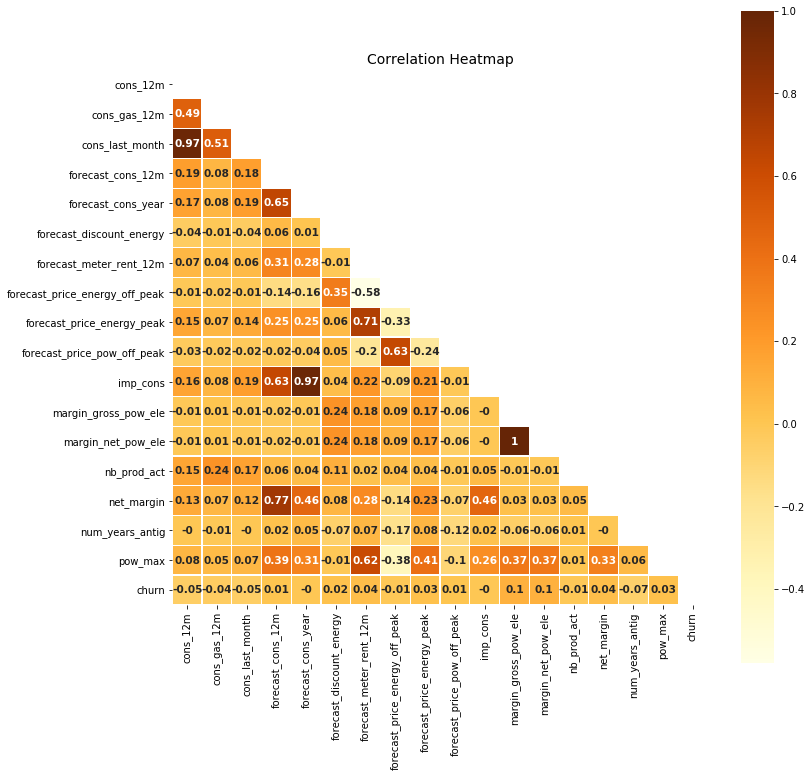

In [108]:
var_corr = round(client_df.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

## From the above heatmap it can be concluded that
1. Not much features are highly correlated to target column
2. Multicollinearity can be removed
2.cons_12m --> cons_last_month
2.forecast_cons_12m --> net_margin
2.forecast_cons_year --> imp_cons
2.forecast_discount_rent_peak --> pow_max
2.forecast_discount_rent_peak --> forecast_price_energy_peak
2.margin_gross_pow_ele --> margin_net_pow_ele

In [90]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [91]:
cp_client = client_df.copy()
cp_client.drop(['channel_sales','id','origin_up'],axis=1,inplace=True)


In [92]:
column = cp_client.columns

In [93]:
shape = cp_client.shape[1]
shape

23

In [94]:
cp_client

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,0,0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,43.648,1
1,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/31/2015,189.95,0,0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,13.800,0
2,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/17/2015,47.96,0,0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,13.856,0
3,1584,0,0,3/30/2010,3/30/2016,3/30/2010,3/31/2015,240.04,0,0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,13.200,0
4,4425,0,526,1/13/2010,3/7/2016,1/13/2010,3/9/2015,445.75,526,0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,32270,47940,0,5/24/2012,5/8/2016,5/8/2015,5/26/2014,4648.01,0,0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,15.000,0
14602,7223,0,181,8/27/2012,8/27/2016,8/27/2012,8/28/2015,631.69,181,0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,6.000,1
14603,1844,0,179,2/8/2012,2/7/2016,2/8/2012,2/9/2015,190.39,179,0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,15.935,1
14604,131,0,0,8/30/2012,8/30/2016,8/30/2012,8/31/2015,19.34,0,0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,11.000,0


In [95]:
import datetime
client_df["year_strt"] = client_df["date_activ"].apply(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y"))
client_df["year_end"] = client_df["date_end"].apply(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y"))
client_df['year_strt'] = client_df['year_strt'].dt.year
client_df["year_end"] = client_df["year_end"].dt.year
client_df['subscription_period'] = client_df['year_end'] - client_df["year_strt"]
client_df['subscription_period']

0        3
1        7
2        6
3        6
4        6
        ..
14601    4
14602    4
14603    4
14604    4
14605    7
Name: subscription_period, Length: 14606, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

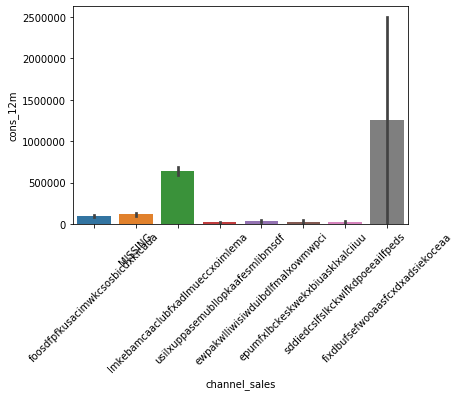

In [96]:
sb.barplot(client_df['channel_sales'],client_df['cons_12m'])
plt.xticks(rotation=45)

<function matplotlib.pyplot.show(*args, **kw)>

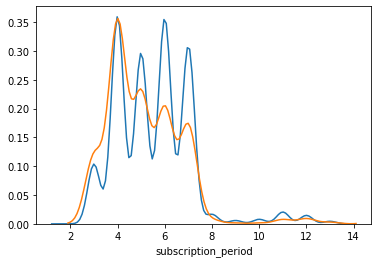

In [97]:
sb.distplot(client_df[client_df['churn']==0]['subscription_period'],hist=False)
sb.distplot(client_df[client_df['churn']==1]['subscription_period'],hist=False)
plt.show

From the above graph it seems that as the subscription period increases trust on the industry goes on increasing, Churn is also lesser in that context although some cases are there in 8-10-12 years but it couldnt be coz of prices..could be of new generation adaptation.
So, only customers those are new subscribers of 2-5 years subscription period they are on major discount risk & prone to prices.

Text(0, 0.5, 'electricity consumption for last 12 months')

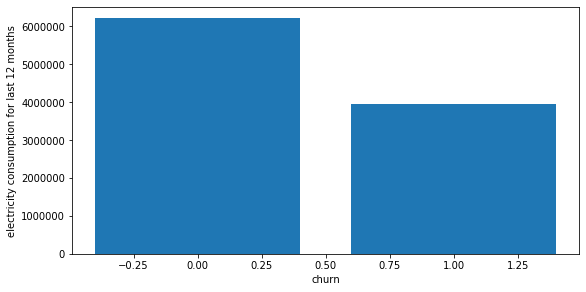

In [98]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.bar(client_df['churn'],client_df['cons_12m'])
plt.xlabel('churn')
plt.ylabel('electricity consumption for last 12 months')

electricity consumption for last 12 months says 

Text(0, 0.5, 'gas consumption for last 12 months')

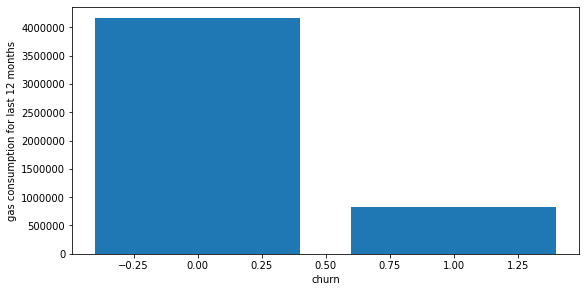

In [99]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,2)
plt.bar(client_df['churn'],client_df['cons_gas_12m'])
plt.xlabel('churn')
plt.ylabel('gas consumption for last 12 months')

Less Churning in case of Gas client than electricity

In [100]:
random_state = 42
plotColor = ['b','g','r','m','c', 'y']
markers = ['+','o','*','^','v','>','<']
def Generate_bar_graph(x, y, x_title, y_title, chart_title,color=plotColor):
    """ Based on x and y value, generate bar graph """
    
    fig, ax = plt.subplots()
    ax.bar(range(len(x))
       , y
       , width = 0.75
       , color=color
        , alpha = 0.6) 

    # stopping alphabetical sorting of graph
    plt.xticks(range(len(x)),x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title,fontsize=13)
    plt.ylabel(y_title,fontsize=13)
    plt.grid(b=False)
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    
    # Visible x - axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
    # Display label for each plot
    for i,v in (enumerate(y)):
        ax.text(i
                ,v+0.05
                ,str(round((v*100),2))+'%'
                ,fontsize=13
                ,ha='center')
    
    plt.show()

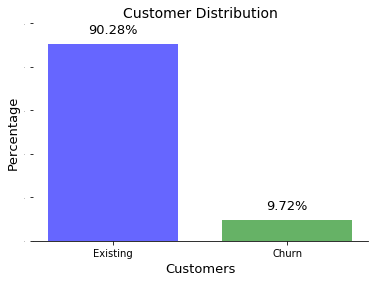

0    0.902848
1    0.097152
Name: churn, dtype: float64


In [101]:
Churn_rate = client_df['churn'].value_counts() / client_df.shape[0]
Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

print(Churn_rate)

In [27]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,0,0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/31/2015,189.95,0,0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/17/2015,47.96,0,0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,3/30/2010,3/31/2015,240.04,0,0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,1/13/2010,3/7/2016,1/13/2010,3/9/2015,445.75,526,0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,5/24/2012,5/8/2016,5/8/2015,5/26/2014,4648.01,0,0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,8/27/2012,8/27/2016,8/27/2012,8/28/2015,631.69,181,0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2/8/2012,2/7/2016,2/8/2012,2/9/2015,190.39,179,0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,8/30/2012,8/30/2016,8/30/2012,8/31/2015,19.34,0,0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [38]:
cp_client['has_gas'].replace({"t":1,"f":0},inplace=True)

In [39]:
cp_client.drop(['date_activ','date_end','date_modif_prod','date_renewal'],axis=1,inplace=True)
def Outlier_boxplot(df, col):
    """ Display boxplot for given column """
    sb.boxplot(x=df[col])
    plt.show()

KeyError: "['date_activ' 'date_end' 'date_modif_prod' 'date_renewal'] not found in axis"

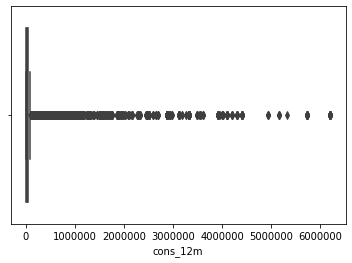

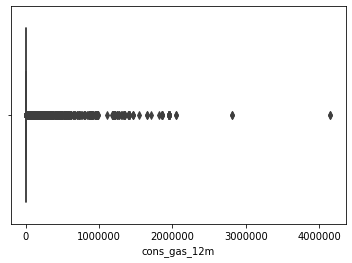

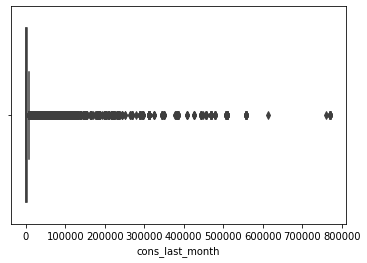

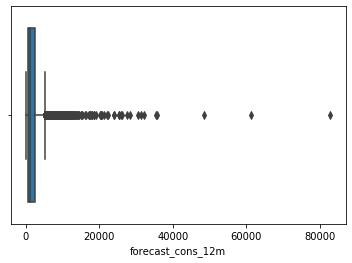

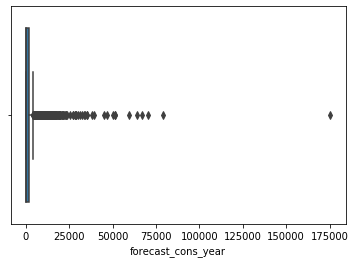

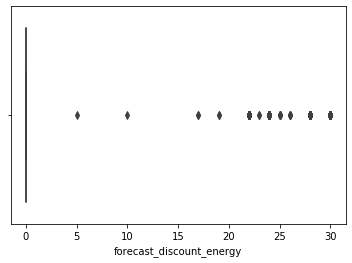

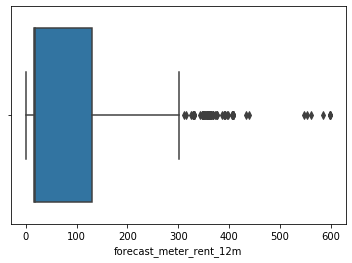

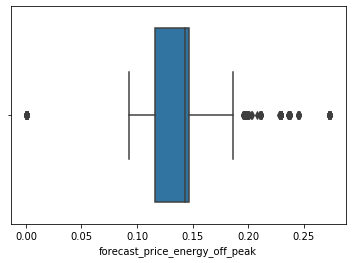

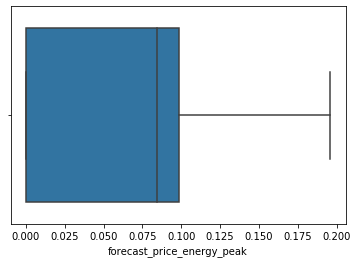

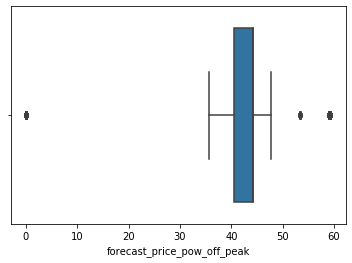

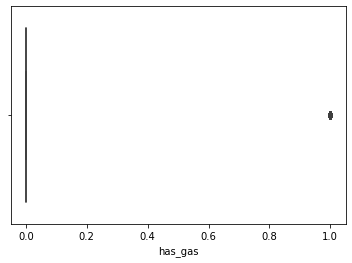

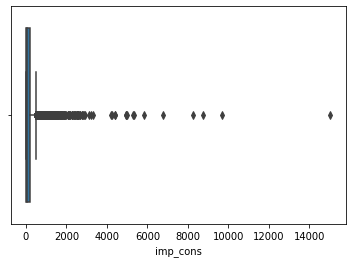

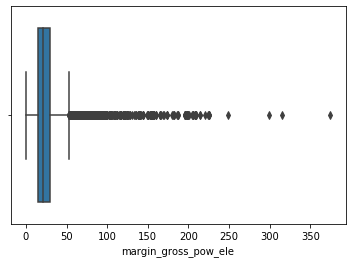

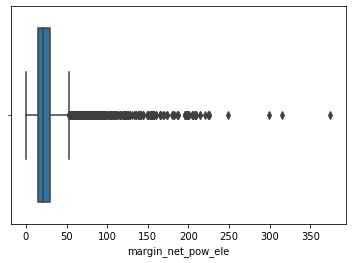

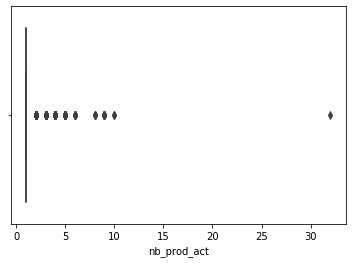

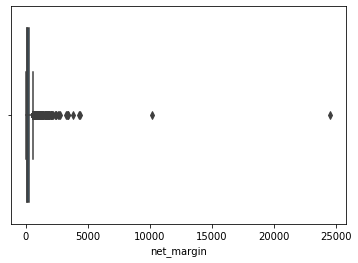

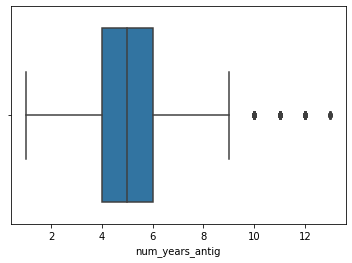

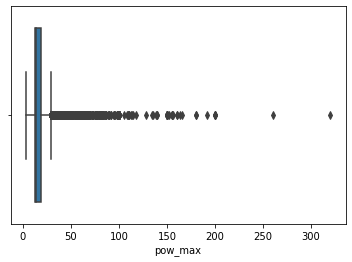

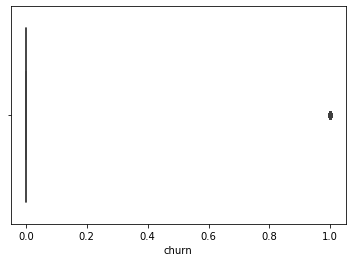

In [40]:
new_clm = cp_client.columns
for i in new_clm:
    Outlier_boxplot(cp_client,i)

In [69]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,0,0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/31/2015,189.95,0,0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/17/2015,47.96,0,0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,3/30/2010,3/31/2015,240.04,0,0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,1/13/2010,3/7/2016,1/13/2010,3/9/2015,445.75,526,0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,5/24/2012,5/8/2016,5/8/2015,5/26/2014,4648.01,0,0,18.57,0.138305,0.000000,44.311378,1,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,8/27/2012,8/27/2016,8/27/2012,8/28/2015,631.69,181,0,144.03,0.100167,0.091892,58.995952,0,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2/8/2012,2/7/2016,2/8/2012,2/9/2015,190.39,179,0,129.60,0.116900,0.100015,40.606701,0,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,8/30/2012,8/30/2016,8/30/2012,8/31/2015,19.34,0,0,7.18,0.145711,0.000000,44.311378,0,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [67]:
def Numerical_distribution(df_cal,feature):
    """ Distribution of numerical variable based on target variable"""
    fig = plt.figure(figsize=(15,10))
    
    plt.subplot(2,1,1)
    ax = sb.kdeplot(df_cal[feature]
                     , color = 'g'
                     , shade = True)
    
    title_str = "Original " +feature + " Distribution"
    plt.title(title_str)
    
    plt.subplot(2,1,2)
    ax = sb.kdeplot(df_cal.loc[(df_cal['churn']==1),feature]
                     , color = 'g'
                     , shade = True
                     , label='chrun')

    ax = sb.kdeplot(df_cal.loc[(df_cal['churn']==0) ,feature]
                     , color = 'b'
                     , shade = True
                     , label='No chrun')
    
    title_str = feature + " Distribution: Churn vs No churn"
    plt.title(title_str)
    plt.show()


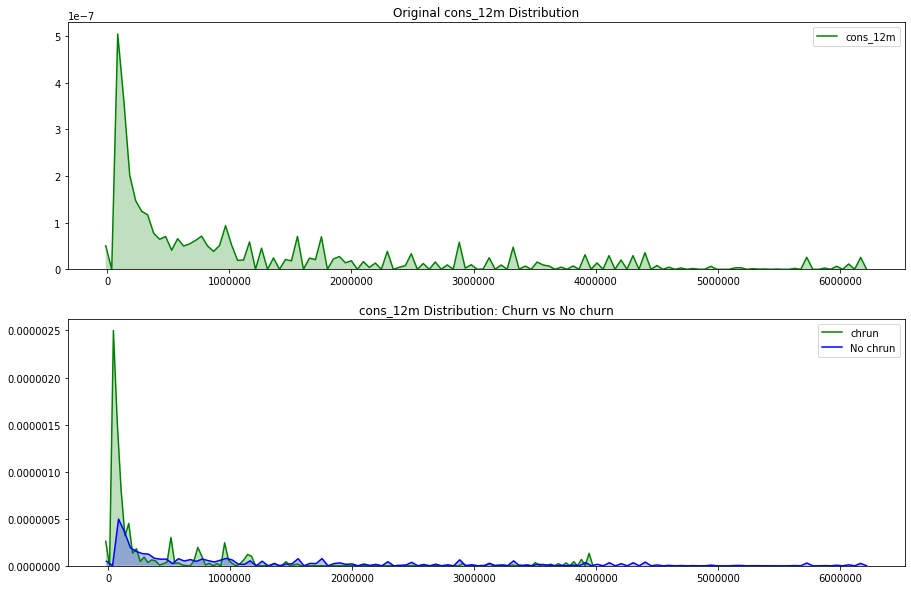

In [68]:
Numerical_distribution(client_df,'cons_12m')

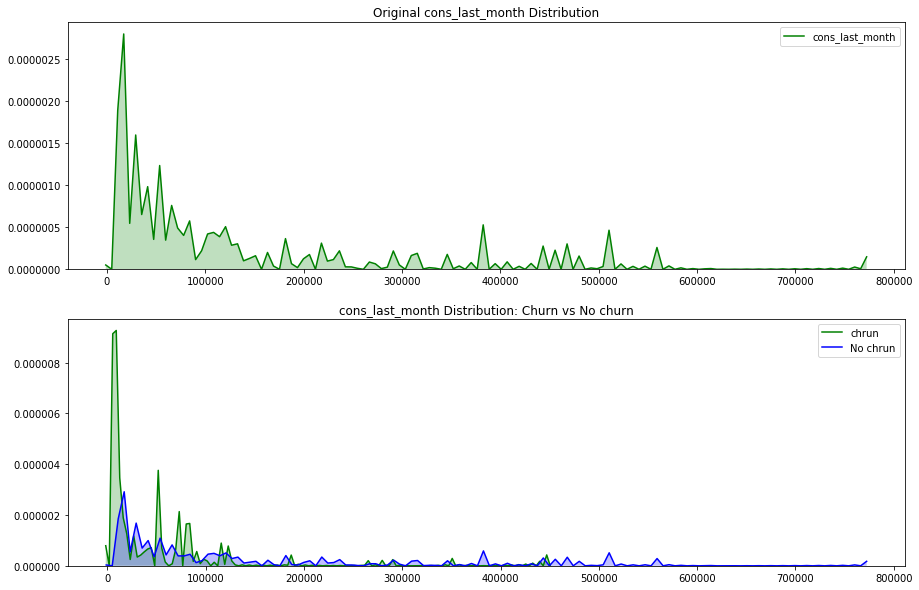

In [71]:
Numerical_distribution(client_df,'cons_last_month')

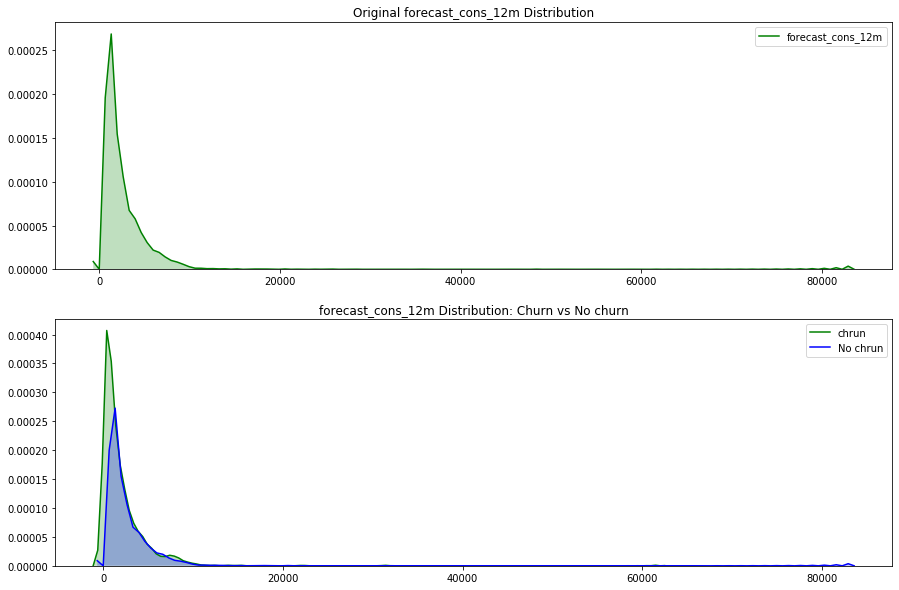

In [72]:
Numerical_distribution(client_df,'forecast_cons_12m')

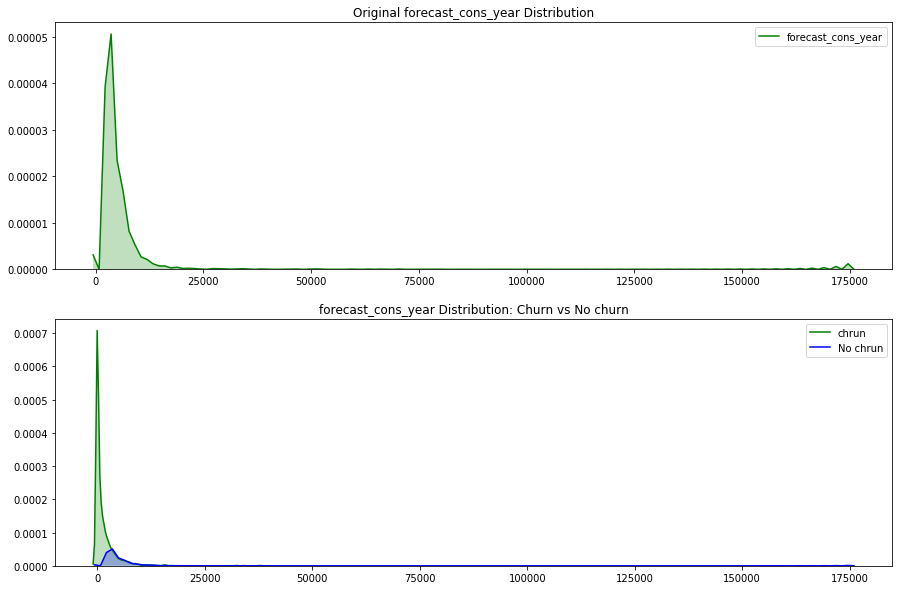

In [73]:
Numerical_distribution(client_df,'forecast_cons_year')

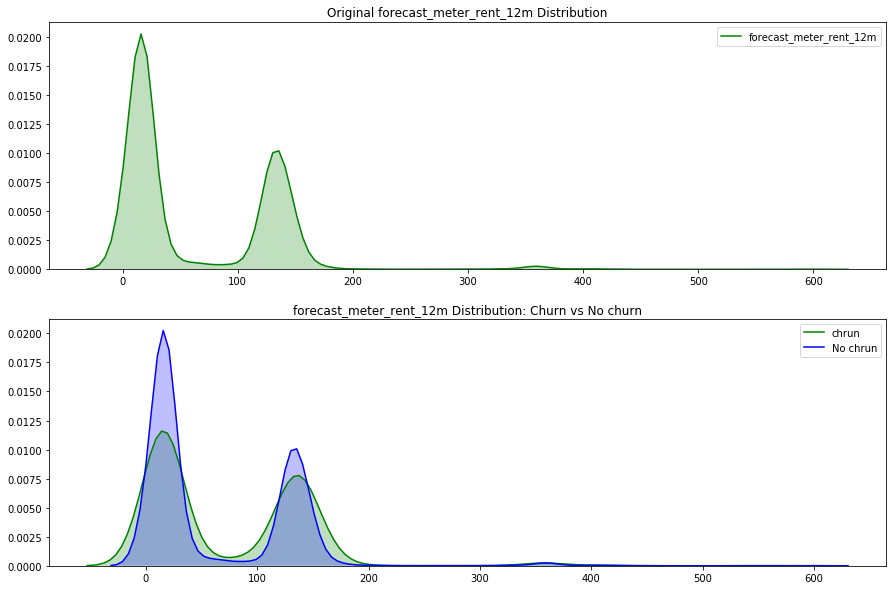

In [75]:
Numerical_distribution(client_df,'forecast_meter_rent_12m')

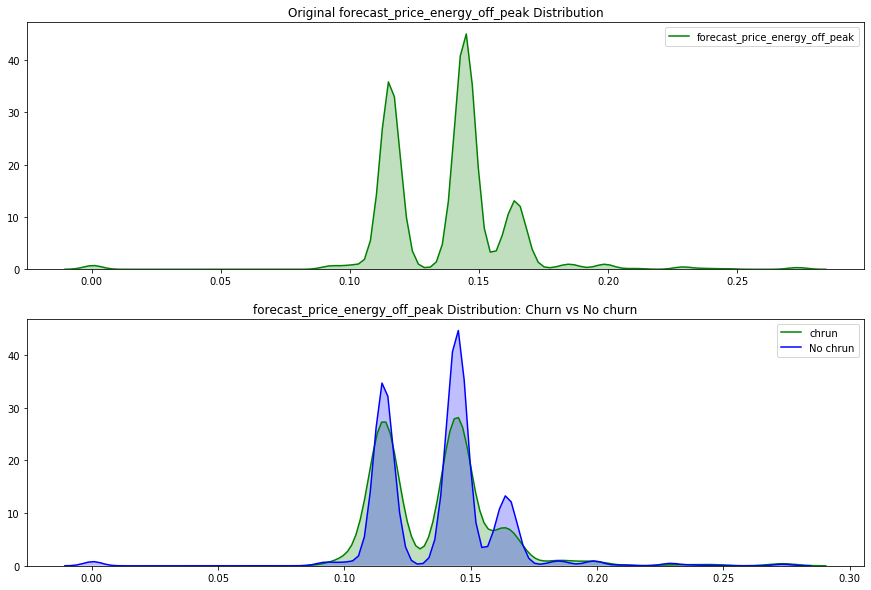

In [76]:

Numerical_distribution(client_df,'forecast_price_energy_off_peak')

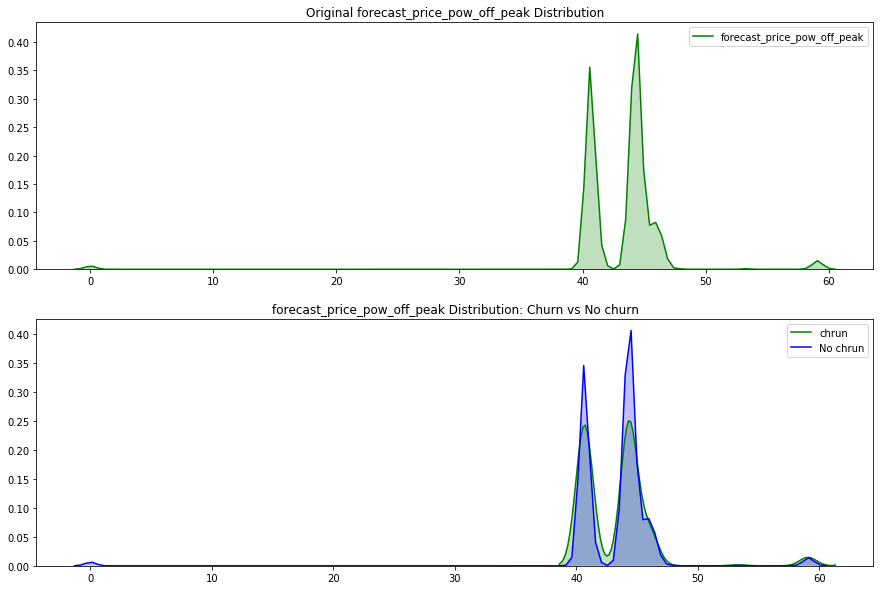

In [77]:

Numerical_distribution(client_df,'forecast_price_pow_off_peak')

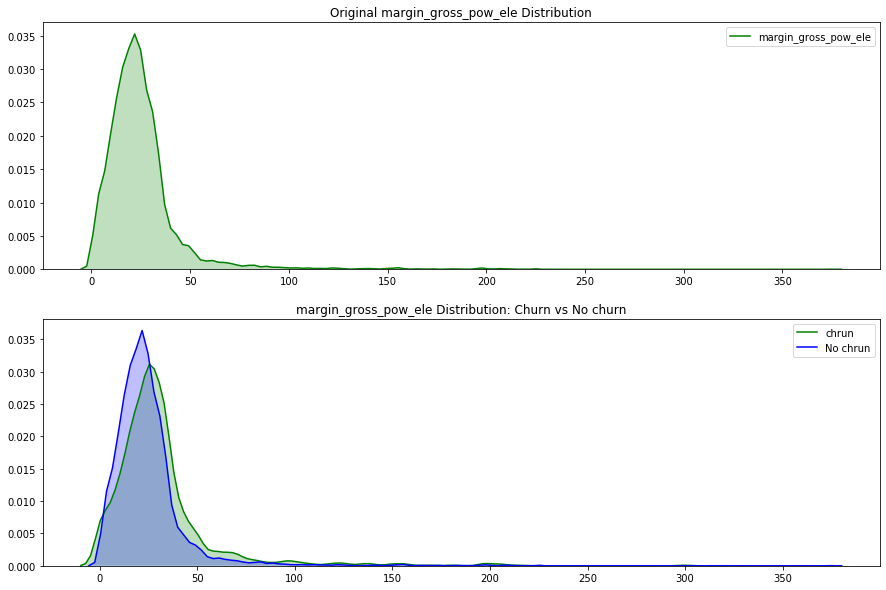

In [79]:
Numerical_distribution(client_df,'margin_gross_pow_ele')

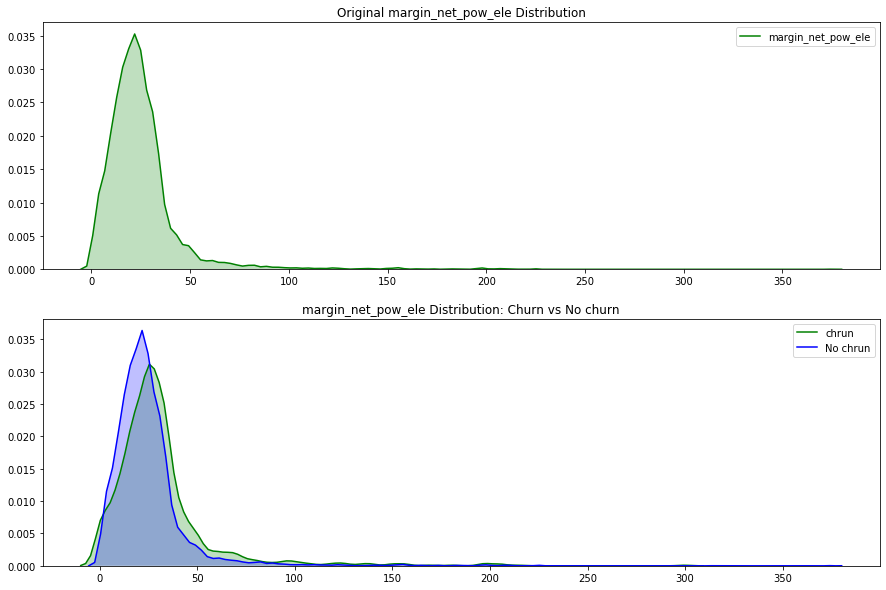

In [80]:

Numerical_distribution(client_df,'margin_net_pow_ele')

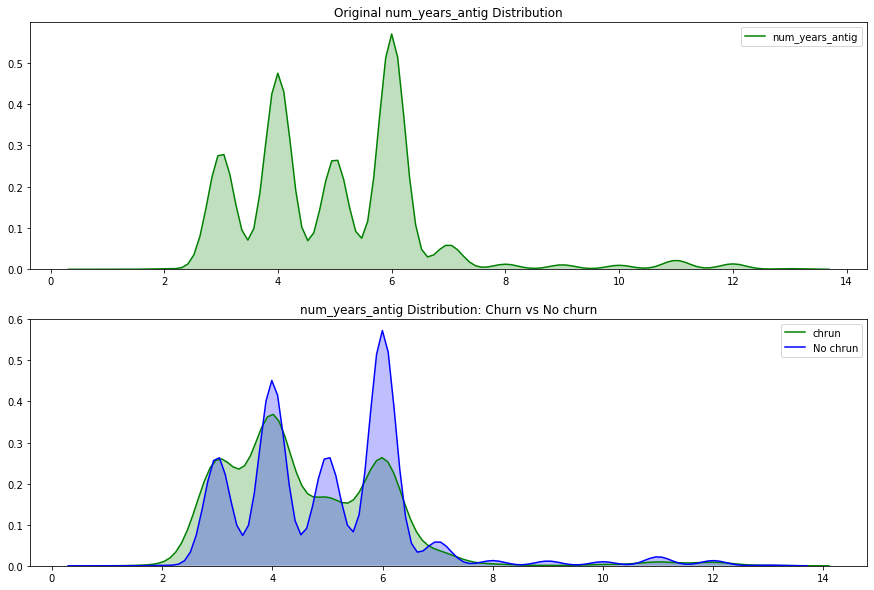

In [82]:
Numerical_distribution(client_df,'num_years_antig')

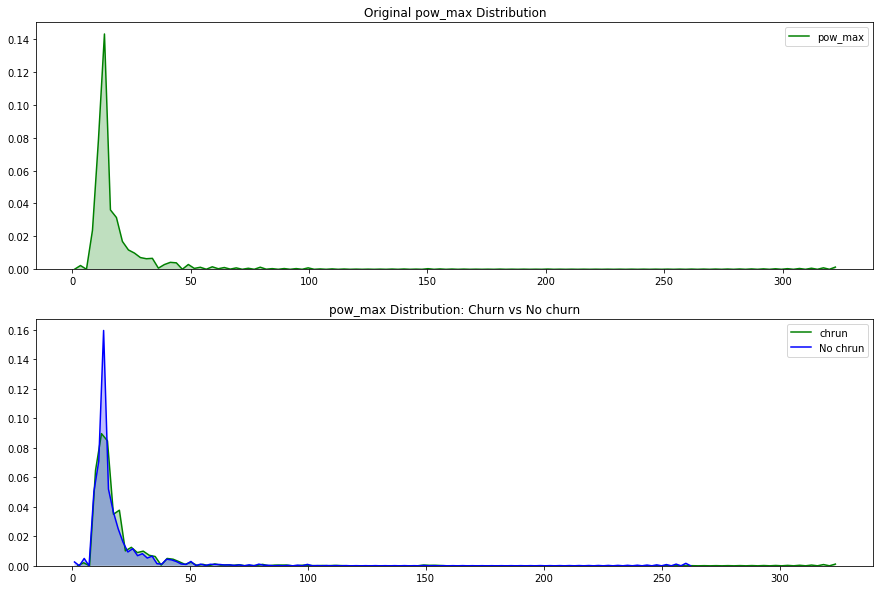

In [83]:

Numerical_distribution(client_df,'pow_max')